# **01. Import Libraries**

In [ ]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import zipfile
import random
import datetime
import shutil
from sklearn.metrics import confusion_matrix
import seaborn as sns
import datetime
from google.colab import files

# **02. Download Data Kaggle**

In [ ]:
# masukkan file kaggle.json ke root google colab

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
# import data rice
!kaggle datasets download -d minhhuy2810/rice-diseases-image-dataset

# import data corn
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

100% 12.0G/12.0G [04:35<00:00, 50.3MB/s]
100% 12.0G/12.0G [04:35<00:00, 46.7MB/s]
 95% 153M/161M [00:04<00:00, 31.2MB/s]
100% 161M/161M [00:04<00:00, 41.0MB/s]


## - Unzip Data

In [ ]:
database_file1 = '/content/rice-diseases-image-dataset.zip'
data_file1 = zipfile.ZipFile(database_file1, 'r')
data_file1.extractall()
data_file1.close()

database_file2 = '/content/corn-or-maize-leaf-disease-dataset.zip'
data_file2 = zipfile.ZipFile(database_file2, 'r')
data_file2.extractall()
data_file2.close()

## - Split Training & Validation Image

### Training

In [ ]:
from google.colab import files

In [ ]:
# make augmentation directory for the results
!mkdir '/content/LabelledRice/Labelled/augmented'

In [ ]:
# take 500 data per label

TRAINING_IMAGE_PATH = []
TRAINING_LABEL = []


# RICE
rice_train_list = ['/content/LabelledRice/Labelled/BrownSpot/', '/content/LabelledRice/Labelled/Healthy/',
                     '/content/LabelledRice/Labelled/Hispa/', '/content/LabelledRice/Labelled/LeafBlast/']

for index in range(len(rice_train_list)):
    for num_image, image in enumerate(os.listdir(rice_train_list[index])):
        if num_image < 500:
            TRAINING_IMAGE_PATH.append(os.path.join(rice_train_list[index], image))

# Rice label
for i in range(500):
    TRAINING_LABEL.append("Padi: Bercak Daun Coklat")
for i in range(500):
    TRAINING_LABEL.append("Padi: Sehat")
for i in range(500):
    TRAINING_LABEL.append("Padi: Hispa")
for i in range(500):
    TRAINING_LABEL.append("Padi: Blas Daun")



# CORN
corn_train_list = ['/content/data/Blight/', '/content/data/Common_Rust/', '/content/data/Gray_Leaf_Spot/',
                   '/content/data/Healthy/']

for index in range(len(corn_train_list)):
    for num_image, image in enumerate(os.listdir(corn_train_list[index])):
        if num_image < 500:
            TRAINING_IMAGE_PATH.append(os.path.join(corn_train_list[index], image))
            
# Corn label
for i in range(500):
    TRAINING_LABEL.append("Jagung: Hawar Daun")
for i in range(500):
    TRAINING_LABEL.append("Jagung: Karat Daun")
for i in range(500):
    TRAINING_LABEL.append("Jagung: Bercak Abu-Abu Daun")
for i in range(500):
    TRAINING_LABEL.append("Jagung: Sehat")

In [ ]:
# Check jumlah image, jumlah label TRAINING

print(len(TRAINING_IMAGE_PATH), len(TRAINING_LABEL))

4000 4000


### Validation

In [ ]:
# take 100 data per label

VALIDATION_IMAGE_PATH = []
VALIDATION_LABEL = []


# RICE
rice_train_list = ['/content/LabelledRice/Labelled/BrownSpot/', '/content/LabelledRice/Labelled/Healthy/',
                     '/content/LabelledRice/Labelled/Hispa/', '/content/LabelledRice/Labelled/LeafBlast/']

for index in range(len(rice_train_list)):
    if index == 0:
        for num_image, image in enumerate(os.listdir(rice_train_list[index])):
            if 500 <= num_image < 523:
                VALIDATION_IMAGE_PATH.append(os.path.join(rice_train_list[index], image))
    elif index == 1:
        for num_image, image in enumerate(os.listdir(rice_train_list[index])):
            if 1000 <= num_image < 1023:
                VALIDATION_IMAGE_PATH.append(os.path.join(rice_train_list[index], image))
    elif index == 2:
        for num_image, image in enumerate(os.listdir(rice_train_list[index])):
            if 500 <= num_image < 523:
                VALIDATION_IMAGE_PATH.append(os.path.join(rice_train_list[index], image))
    else:
        for num_image, image in enumerate(os.listdir(rice_train_list[index])):
            if 500 <= num_image < 523:
                VALIDATION_IMAGE_PATH.append(os.path.join(rice_train_list[index], image))

# Tomato label
for i in range(23):
    VALIDATION_LABEL.append("Padi: Bercak Daun Coklat")
for i in range(23):
    VALIDATION_LABEL.append("Padi: Sehat")
for i in range(23):
    VALIDATION_LABEL.append("Padi: Hispa")
for i in range(23):
    VALIDATION_LABEL.append("Padi: Blas Daun")



# CORN
corn_train_list = ['/content/data/Blight/', '/content/data/Common_Rust/', '/content/data/Gray_Leaf_Spot/',
                   '/content/data/Healthy/']

for index in range(len(corn_train_list)):
    if index != 2: 
        for num_image, image in enumerate(os.listdir(corn_train_list[index])):
            if 1000 <= num_image < 1023:
                VALIDATION_IMAGE_PATH.append(os.path.join(corn_train_list[index], image))
    else:
        for num_image, image in enumerate(os.listdir(corn_train_list[index])):
            if 500 <= num_image < 523:
                VALIDATION_IMAGE_PATH.append(os.path.join(corn_train_list[index], image))
            
# Corn label
for i in range(23):
    VALIDATION_LABEL.append("Jagung: Hawar Daun")
for i in range(23):
    VALIDATION_LABEL.append("Jagung: Karat Daun")
for i in range(23):
    VALIDATION_LABEL.append("Jagung: Bercak Abu-Abu Daun")
for i in range(23):
    VALIDATION_LABEL.append("Jagung: Sehat")

In [ ]:
# Check jumlah image, jumlah label VALIDATION

print(len(VALIDATION_IMAGE_PATH), len(VALIDATION_LABEL))

184 184


# **03. Data**

## 1. Import Data

### Training Dataset

In [ ]:
database_train = pd.DataFrame(TRAINING_IMAGE_PATH, columns=['path'])
database_train['label'] = TRAINING_LABEL

database_train.head()

,path,label
0,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
1,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
2,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
3,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
4,/content/LabelledRice/Labelled/BrownSpot/IMG_3...,Padi: Bercak Daun Coklat


### Validation Dataset

In [ ]:
database_val = pd.DataFrame(VALIDATION_IMAGE_PATH, columns=['path'])
database_val['label'] = VALIDATION_LABEL

database_val.head()

,path,label
0,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
1,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
2,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
3,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat
4,/content/LabelledRice/Labelled/BrownSpot/IMG_2...,Padi: Bercak Daun Coklat


## 2. Encoding Label

In [ ]:
# unique labels

unique_label = np.array(database_train['label'].unique())
unique_label

array(['Padi: Bercak Daun Coklat', 'Padi: Sehat', 'Padi: Hispa',
       'Padi: Blas Daun', 'Jagung: Hawar Daun', 'Jagung: Karat Daun',
       'Jagung: Bercak Abu-Abu Daun', 'Jagung: Sehat'], dtype=object)

In [ ]:
# num unique labels

num_unique_label = len(unique_label)
num_unique_label

8

In [ ]:
# Encoding labels
# Turns into boolean array for all index

# train
boolean_array = [database_train['label'][i] == unique_label for i in range(len(database_train))]

# validation
boolean_array_val = [database_val['label'][i] == unique_label for i in range(len(database_val))]

In [ ]:
# check boolean array for data in index 0

boolean_array[0]

array([ True, False, False, False, False, False, False, False])

## 3. Turn Data into Set

### - Define X_train, y_train, X_val, y_val

In [ ]:
# train
X_train = database_train['path']
y_train = boolean_array

# validation
X_val = database_val['path']
y_val = boolean_array_val

### - Turn into Tensor Sets

In [ ]:
# train
train_set = tf.data.Dataset.from_tensor_slices(( tf.constant(X_train), tf.constant(y_train) ))

# validation
val_set = tf.data.Dataset.from_tensor_slices(( tf.constant(X_val), tf.constant(y_val) ))

## 4. Shuffling Training Set

In [ ]:
BUFFER_SIZE = len(train_set)

train_set = train_set.shuffle(BUFFER_SIZE)

# **04. Preprocess Data**

## 1. Preprocess Image

Turn image into numbers, normalize pixel values, resize shape of the image

In [ ]:
# our desired image size
IMAGE_SIZE = 224

# read, turn image into number, normalize, resize
def preprocess_image(image_path, labels=None):
    # read image
    image = tf.io.read_file(image_path)
    # turn jpeg into numbers
    image = tf.image.decode_jpeg(image, channels=3)
    # scaling / normalize (0,255) menjadi (0,1)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # resize to (224,224)
    image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
    # return
    return image, labels

In [ ]:
# apply

train_set = train_set.map(preprocess_image)
val_set = val_set.map(preprocess_image)

## 2. Batching

In [ ]:
# batch size
BATCH_SIZE = 32

# batching train & validation set
train_set = train_set.batch(BATCH_SIZE)
val_set = val_set.batch(BATCH_SIZE)

In [ ]:
# check element spec

train_set.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 8), dtype=tf.bool, name=None))

# **05. Show Images (Optional)**

Show images and their label in one batch (32 images)

In [ ]:
def show_images_in_a_batch(images, labels):
    # create a figure
    plt.figure(figsize=(15, 15))

    # for each image in one batch (32 images)
    for i in range(32):

        # Create subplots (8 rows, 5 columns)
        ax = plt.subplot(8, 5, i+1)  # i = index

        # Show the image 
        plt.imshow(images[i])

        # Add the image label as the title
        plt.title(unique_label[np.argmax(labels[i])])

        # Turn the grid lines off
        plt.axis("off")

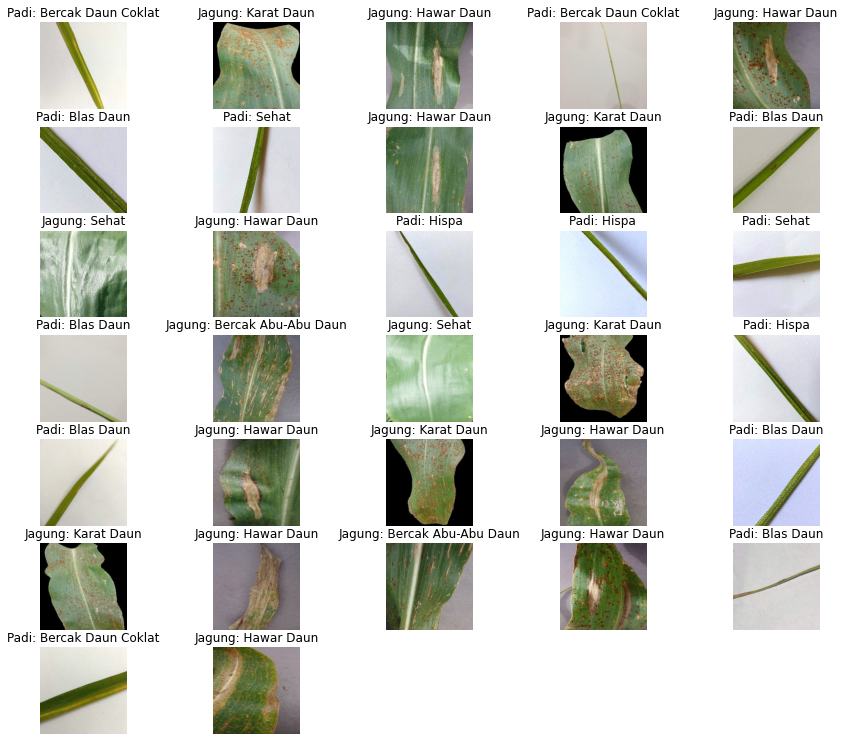

In [ ]:
# take one random batch from training set
sample_train_images, sample_train_labels = next(iter(train_set))

# show
show_images_in_a_batch(sample_train_images, sample_train_labels)

# **06. Build Tranfer Learning Model**

With ResNet50 model https://tfhub.dev/tensorflow/resnet_50/feature_vector/1

## 1. Create Model

In [ ]:
model = tf.keras.Sequential([
                             # transfer learning model
                             hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"),
                             
                             # output layer
                             tf.keras.layers.Dense(units=num_unique_label, activation='softmax')
])

## 2. Compile Model

In [ ]:
# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# build the model and pass the input shape
model.build(input_shape = [None, 224, 224, 3])

## 3. Create Callback

In [ ]:
# EARLYSTOPPING CALLBACK
# monitor the val loss (prevent overfitting)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# CUSTOM CALLBACK
# stop training once training accuracy reaches 99.0%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.0% accuracy stop training!")
      self.model.stop_training = True

# create accuracy_callback and call myCallback class
accuracy_callback = myCallback()

## 4. Training Model

In [ ]:
history_train = model.fit(train_set, epochs=50,
                          validation_data = val_set,
                          callbacks=[accuracy_callback, early_stopping])

Epoch 1/50
125/125 [==============================] - 204s 1s/step - loss: 0.8544 - accuracy: 0.6480 - val_loss: 0.6136 - val_accuracy: 0.7120
Epoch 2/50
125/125 [==============================] - 142s 1s/step - loss: 0.5743 - accuracy: 0.7678 - val_loss: 0.5322 - val_accuracy: 0.7772
Epoch 3/50
125/125 [==============================] - 134s 1s/step - loss: 0.5167 - accuracy: 0.7900 - val_loss: 0.5123 - val_accuracy: 0.7935
Epoch 4/50
125/125 [==============================] - 134s 1s/step - loss: 0.4660 - accuracy: 0.8158 - val_loss: 0.5192 - val_accuracy: 0.7935
Epoch 5/50
125/125 [==============================] - 135s 1s/step - loss: 0.4440 - accuracy: 0.8300 - val_loss: 0.5185 - val_accuracy: 0.7772
Epoch 6/50
125/125 [==============================] - 134s 1s/step - loss: 0.4171 - accuracy: 0.8385 - val_loss: 0.4901 - val_accuracy: 0.7880
Epoch 7/50
125/125 [==============================] - 135s 1s/step - loss: 0.4018 - accuracy: 0.8420 - val_loss: 0.5031 - val_accuracy: 0.7989

## 5. Save Model

In [ ]:
import keras
from keras.models import load_model

model.save('resnet50_padi_jgg_500.h5')

## 6. Load Model

In [ ]:
# model = tf.keras.models.load_model(('resnet50_padi_jgg_500.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

# **07. Accuracy & Loss**

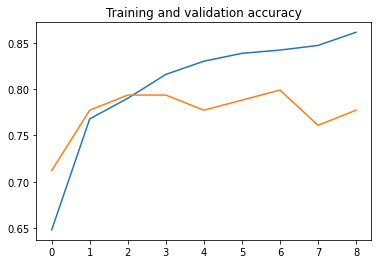

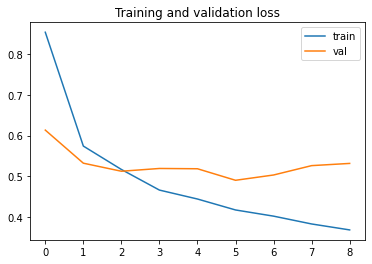

In [ ]:
# train
acc = history_train.history['accuracy']
loss = history_train.history['loss']

# validation
val_acc = history_train.history['val_accuracy']
val_loss = history_train.history['val_loss']

# range number of epochs
epochs = range(len(acc))

# plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

# plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title ('Training and validation loss')

plt.legend(['train', 'val'])

# **08.Testing**

In [ ]:
# upload files
uploaded=files.upload()

filename = []
test_images = []

for fn in uploaded.keys():
    filename.append(fn)
    path='/content/' + fn
    test_images.append(path)

# turn into set
test_set = tf.data.Dataset.from_tensor_slices(( tf.constant(test_images) ))

# preprocess
test_set = test_set.map(preprocess_image)

# batching
test_set = test_set.batch(batch_size=32)

# predict
test_predictions = model.predict(test_set)

label_prediction = []
for i in range(len(test_predictions)):
    label_prediction.append(unique_label[np.argmax(test_predictions[i])])

# show prediction results
for i in range(len(test_images)):
    print(label_prediction[i])
    pil_img = Image(filename=test_images[i], width=150, height=150)
    display(pil_img)

Output hidden; open in https://colab.research.google.com to view.